# Toy example to design state-fate experiments

Although we assume many parameters here (uniform division, perfect spliting, perfect profiling, etc.), this `R` code aims to give an idea on how to think when designing state-fate experiments lineage tracing techniques (e.g. integration barcodes later expressed). For more complex designs, the user can read the Supplementary methods of [Weinreb, Rodriguez-Fraticelli et al. Science 2020](https://doi.org/10.1126/science.aaw3381), [Rodriguez-Fraticelli et al. Nature 2020](https://doi.org/10.1038/s41586-020-2503-6) or the detailed explanations and [web app](http://celltag.org/) of [Kong et al. Nature Protocols 2020](https://doi.org/10.1038/s41586-018-0744-4).

If you want to run this code, please, navigate to Runtime -> Change runtime type and select R.

In [1]:
cells_at_begining <- paste("barcode", 1:100000, sep ="_")
clones <- cells_at_begining
pool_before_splitting <- data.frame(
    clones = rep(clones, each = 2),
    cellID_after_division = paste("cell", 1:200000, sep ="_"))

In [2]:
head(pool_before_splitting) # visualize the structure of the data object

,clones,cellID_after_division
,<chr>,<chr>
1,barcode_1,cell_1
2,barcode_1,cell_2
3,barcode_2,cell_3
4,barcode_2,cell_4
5,barcode_3,cell_5
6,barcode_3,cell_6


In [3]:
simulations <- lapply(1:500, function(iteration) { # the code is not parallelized for simplicity
  sampling <- sample(1:nrow(pool_before_splitting), size = 100000, replace = FALSE) # random split
  pool_A <- pool_before_splitting[sampling, ]
  pool_B <- pool_before_splitting[-sampling, ]
  experiment_on_pool_B <- sample(1:nrow(pool_B), size = 100000 * 0.01, replace = FALSE) # LD99
  profiling_pool_A <- pool_A  # state
  profiling_pool_B <- pool_B[experiment_on_pool_B, ]  # fate
  sum(unique(profiling_pool_B$clones) %in% unique(profiling_pool_A$clones))
})
simulations <- unlist(simulations)

In [4]:
sample(simulations, size = 10, replace = FALSE) # show the result of 10 random iterations

[1] 476 492 492 502 504 487 504 474 482 496

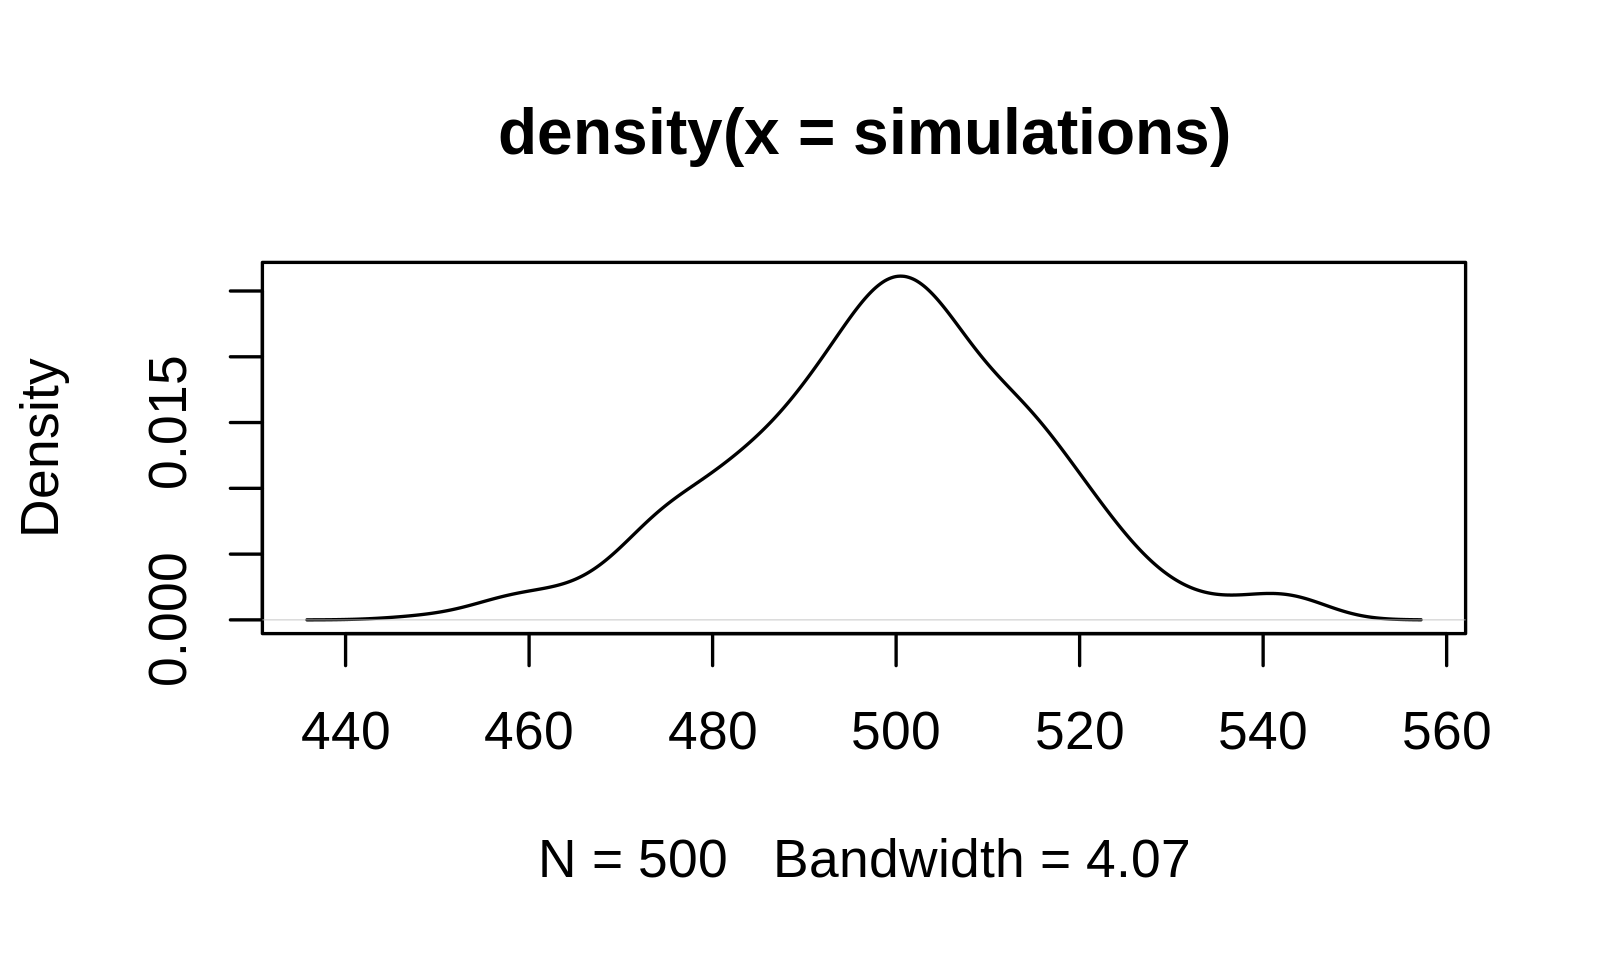

In [5]:
options(repr.plot.width = 5, repr.plot.height = 3, repr.plot.res = 320)
plot(density(simulations))